## The goal of this Project is to make three recommendations for Microsoft that plans to get into the business of movie making. Based on our analysis we need to provide an input about the kind of movies that are profitable and are doing great

Import all the needed libraries for this project

In [1]:
# Run this cell without changes
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Define some functions that I need for the analysis.
The function *convert_dollars_to_float* takes a dataframe and a column which is string but contains money in dollars, and converts it into a float

In [2]:
def convert_dollars_to_float(df, col):
    df[col] = df[col].str.replace('$', '')
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].astype(float)
    return df[col]    

The three functions below are used to get mean, std and sum values for a list of dataframes.

In [3]:
def get_mean_values(df_list,col):
    mean_vals_list=[]
    for df in df_list:
        mean_vals_list.append(round(df[col].mean(),2))
    return mean_vals_list

In [4]:
def get_std_values(df_list, col):
    std_vals_list=[]
    for df in df_list:
        std_vals_list.append(round(df[col].std(),2))
    return std_vals_list

In [5]:
def get_sum_values(df_list,col):
    sum_vals_list=[]
    for df in df_list:
        sum_vals_list.append(round(df[col].sum(),2))
        print(round(df[col].sum(),2))
    return sum_vals_list

Open the connection to the database and load the sql tables. I will be using the tables *movie_basics, 
movie_ratings, persons* and *directors*.

In [6]:
conn = sqlite3.Connection("zippedData/im.db")
conn

In [7]:
q0 = """
SELECT *
FROM movie_basics
;
"""
df_movie_basics=pd.read_sql(q0, conn)
df_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [8]:
#df_movie_basics.drop(columns=['runtime_minutes'],axis=1)
df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
q0 = """
SELECT *
FROM movie_ratings
;
"""

df_movie_ratings=pd.read_sql(q0, conn)
df_movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [58]:
q0 = """
SELECT *
FROM movie_akas
;
"""

df_movie_akas=pd.read_sql(q0, conn)
df_movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [59]:
df_movie_akas[df_movie_akas['language']=='en']

,movie_id,ordering,title,region,language,types,attributes,is_original_title
87,tt10027708,2,Miguelito,XWW,en,imdbDisplay,None,0.0
89,tt10027708,4,Miguelito,AU,en,None,None,0.0
95,tt1014759,10,Alice Dar Sarzamin E Ajayeb,IE,en,imdbDisplay,None,0.0
127,tt1014759,3,Alice in Wonderland,JP,en,None,None,0.0
142,tt10225354,3,Returning Home,XWW,en,alternative,None,0.0
...,...,...,...,...,...,...,...,...
331679,tt9644084,3,The Breath,XWW,en,alternative,None,0.0
331680,tt9654246,1,The Wild Man of the North,XWW,en,imdbDisplay,None,0.0
331683,tt9657946,1,Homing,XWW,en,imdbDisplay,None,0.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0


In [60]:
df_movie_akas.region.value_counts()

US     51490
XWW    18467
RU     13817
DE     11634
FR     10990
       ...  
CF         1
NC         1
KN         1
MQ         1
LY         1
Name: region, Length: 213, dtype: int64

In [61]:
df_movie_akas[df_movie_akas['region']=='US']

,movie_id,ordering,title,region,language,types,attributes,is_original_title
12,tt0369610,21,Jurassic World 3D,US,None,None,3-D version,0.0
20,tt0369610,29,Jurassic World,US,None,None,None,0.0
21,tt0369610,2,Ebb Tide,US,None,None,fake working title,0.0
28,tt0369610,36,Jurassic Park IV,US,None,working,None,0.0
37,tt0369610,44,Jurassic Park 4,US,None,None,informal alternative title,0.0
...,...,...,...,...,...,...,...,...
331645,tt9310460,6,Coconut the Little Dragon 2 Into the Jungle,US,None,imdbDisplay,None,0.0
331654,tt9358044,2,Hail Satan?,US,None,imdbDisplay,None,0.0
331673,tt9562694,5,Alien Warfare,US,None,imdbDisplay,None,0.0
331686,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,None,imdbDisplay,None,0.0


# <span style="color:red"> **I should check if using region (USA) brings any change in the distriutions below. For this I will have to Join movie_akas sql table. I may come back to this if I have some more time** text</span>
#### Here I am quering over maby SQL tables. My goal is to get one table that has info about movies, genres, ratings and directors. This definitely will have less data as compared to individual tables, but we need to have all this info for any given movie to do some sensible analysis.

In [70]:
q0 = """
SELECT 
    mbasics.movie_id,
    mbasics.primary_title,
    mbasics.start_year,
    mbasics.genres,
    mbasics.runtime_minutes,
    p.primary_name,
    p.person_id,
    mratings.averagerating,
    mratings.numvotes,
    pr.category
    FROM movie_basics AS mbasics
JOIN
    movie_ratings AS mratings
    USING(movie_id)
JOIN
    directors AS dir
    USING(movie_id)
JOIN
    principals AS pr
    USING(movie_id)    
JOIN
    persons AS p
    USING(person_id)      
WHERE
    pr.category='director'
;
"""
df_movie_db=pd.read_sql(q0, conn)
df_movie_db

,movie_id,primary_title,start_year,genres,runtime_minutes,primary_name,person_id,averagerating,numvotes,category
0,tt0323808,The Wicker Tree,2011,"Drama,Horror",96.0,Robin Hardy,nm0362736,3.9,2328,director
1,tt0417610,Asleep in the Sun,2010,Fantasy,83.0,Alejandro Chomski,nm1145057,6.4,80,director
2,tt0417610,Asleep in the Sun,2010,Fantasy,83.0,Alejandro Chomski,nm1145057,6.4,80,director
3,tt0469152,Smoking/Non-Smoking,2011,Drama,84.0,Alyssa R. Bennett,nm0707738,7.2,88,director
4,tt0469152,Smoking/Non-Smoking,2011,Drama,84.0,Alyssa R. Bennett,nm0707738,7.2,88,director
...,...,...,...,...,...,...,...,...,...,...
437148,tt9670894,Veergati,2019,Action,61.0,Vishal Desai,nm4039933,6.9,10,director
437149,tt9670894,Veergati,2019,Action,61.0,Raju Desai,nm7840985,6.9,10,director
437150,tt9670894,Veergati,2019,Action,61.0,Raju Desai,nm7840985,6.9,10,director
437151,tt9670894,Veergati,2019,Action,61.0,Raju Desai,nm7840985,6.9,10,director


Removing some duplicate entries. Need to investiagte why they are there!

In [72]:
df_movie_db=df_movie_db.drop_duplicates()

In [73]:
df_movie_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80341 entries, 0 to 437152
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         80341 non-null  object 
 1   primary_title    80341 non-null  object 
 2   start_year       80341 non-null  int64  
 3   genres           79595 non-null  object 
 4   runtime_minutes  72027 non-null  float64
 5   primary_name     80341 non-null  object 
 6   person_id        80341 non-null  object 
 7   averagerating    80341 non-null  float64
 8   numvotes         80341 non-null  int64  
 9   category         80341 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 6.7+ MB


In [74]:
df_movie_db["genres"].value_counts()

Drama                        12412
Documentary                  11730
Comedy                        5604
Horror                        3523
Comedy,Drama                  2740
                             ...  
Comedy,History,News              1
Biography,History,Romance        1
Drama,War,Western                1
History,Sci-Fi,Thriller          1
Biography,History,Music          1
Name: genres, Length: 893, dtype: int64

The genres are not so well defined and in many cases a movie falls under more than one category. This means
the way my analysis is going to be done will have some uncertanity/errors associated to it

Also I notice many duplicates. I dont quite understand the origin for that. But in any case I decide to drop
further using *person_id* and *primary_title*

In [75]:
df_movie_db=df_movie_db.drop_duplicates(subset='person_id', keep="first")
#df_movie_db=df_movie_db.drop_duplicates(subset='primary_title', keep="first")
df_movie_db['primary_title'].value_counts()

World of Death                                       61
Milano 55,1. Cronaca di una settimana di passioni    59
Our RoboCop Remake                                   54
50 Kisses                                            45
Hanky Code: The Movie                                30
                                                     ..
Sweeping Forward                                      1
Kurangu Bommai                                        1
The LXD: The Secrets of the Ra                        1
Fósforo Frio                                          1
The Class of 92                                       1
Name: primary_title, Length: 43920, dtype: int64

It is not clear to me, why there are more than 1 entry for a given movie. It looks like thre are multiple 
directors associated with some movies which could be possible, but 61 is too many!! 
For now I will keep only the first entry, but will have to revisit!

In [76]:
df_movie_db[df_movie_db['primary_title']=='World of Death']

,movie_id,primary_title,start_year,genres,runtime_minutes,primary_name,person_id,averagerating,numvotes,category
307815,tt4050462,World of Death,2016,"Comedy,Horror,Sci-Fi",142.0,Jay Wade Edwards,nm0250080,7.2,31,director
307907,tt4050462,World of Death,2016,"Comedy,Horror,Sci-Fi",142.0,A Normale Jef,nm0340236,7.2,31,director
307953,tt4050462,World of Death,2016,"Comedy,Horror,Sci-Fi",142.0,Craig Ouellette,nm0653573,7.2,31,director
308045,tt4050462,World of Death,2016,"Comedy,Horror,Sci-Fi",142.0,Steven Payne,nm1121352,7.2,31,director
308229,tt4050462,World of Death,2016,"Comedy,Horror,Sci-Fi",142.0,Doug Turner,nm1726235,7.2,31,director
...,...,...,...,...,...,...,...,...,...,...
311357,tt4050462,World of Death,2016,"Comedy,Horror,Sci-Fi",142.0,Dimitri Castiglioni,nm7153452,7.2,31,director
311403,tt4050462,World of Death,2016,"Comedy,Horror,Sci-Fi",142.0,M.J. Koleszar,nm7403267,7.2,31,director
311449,tt4050462,World of Death,2016,"Comedy,Horror,Sci-Fi",142.0,Félix Catala,nm8337607,7.2,31,director
311495,tt4050462,World of Death,2016,"Comedy,Horror,Sci-Fi",142.0,Timothy Thomas,nm8372979,7.2,31,director


In [77]:
df_movie_db['numvotes'].value_counts()

6        2424
5        2213
7        2080
8        1873
9        1514
         ... 
74998       1
7409        1
5360        1
5328        1
4098        1
Name: numvotes, Length: 4707, dtype: int64

In [78]:
df_movie_db=df_movie_db.drop_duplicates(subset='primary_title', keep="first")
df_movie_db["primary_name"].value_counts()
#df_movie_db.head(50)

Mark Lewis                   4
Adam Green                   3
Bing Wang                    3
Ryan McKenna                 3
John Williams                3
                            ..
Nick Brandestini             1
Örn Marino Arnarson          1
Georgiy Skomorovskiy         1
Alfonso Cortés-Cavanillas    1
Walmer Sitohang              1
Name: primary_name, Length: 43654, dtype: int64

In [79]:
#df_genres=df_movie_db.groupby(['genres']).mean()
#df_genres
df_movie_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43920 entries, 0 to 437152
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         43920 non-null  object 
 1   primary_title    43920 non-null  object 
 2   start_year       43920 non-null  int64  
 3   genres           43469 non-null  object 
 4   runtime_minutes  39468 non-null  float64
 5   primary_name     43920 non-null  object 
 6   person_id        43920 non-null  object 
 7   averagerating    43920 non-null  float64
 8   numvotes         43920 non-null  int64  
 9   category         43920 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 3.7+ MB


In [80]:
df_movie_db[df_movie_db['genres'].isnull()]

,movie_id,primary_title,start_year,genres,runtime_minutes,primary_name,person_id,averagerating,numvotes,category
189,tt1472211,The Bounty Hunter,2010,None,NaN,Yugesh Walia,nm1288886,6.3,29,director
2228,tt1790807,Pig Death Machine,2013,None,82.0,Jon Moritsugu,nm0605748,6.0,20,director
2414,tt1949541,Full Firearms,2012,None,NaN,Emily Wardill,nm4484801,7.5,10,director
2782,tt1543303,Die Haushaltshilfe,2010,None,60.0,Anna Hoffmann,nm3292830,9.2,6,director
2821,tt1603273,Bushidô Sixteen,2010,None,109.0,Tomoyuki Furumaya,nm0299197,6.6,59,director
...,...,...,...,...,...,...,...,...,...,...
435007,tt7980216,From All Corners,2018,None,93.0,Ryusuke Okajima,nm3928208,7.6,5,director
435099,tt9030796,Possible Faces,2018,None,132.0,Kang-hyun Lee,nm6544270,6.4,7,director
435398,tt7308686,Anaan,2017,None,NaN,Rajesh Kushte,nm9234987,6.0,5,director
435715,tt7131966,Sakura sakura sakura,2017,None,NaN,Masami Murai,nm5814328,1.0,76,director


In [82]:
df_movie_db.sort_values(by=['start_year'], ascending=False).head(20)

,movie_id,primary_title,start_year,genres,runtime_minutes,primary_name,person_id,averagerating,numvotes,category
437152,tt9681728,A Russian Youth,2019,"Drama,War",72.0,Alexander Zolotukhin,nm10436661,6.6,34,director
430606,tt8083606,Rebels,2019,Comedy,87.0,Allan Mauduit,nm1879912,6.4,231,director
6442,tt10135068,1964: O Brasil entre armas e livros,2019,Documentary,127.0,Lucas Ferrugem,nm10598050,6.9,230,director
291765,tt6155456,Juanita,2019,Drama,90.0,Clark Johnson,nm0424800,6.0,1535,director
6445,tt10215026,Mon Jane na,2019,Action,NaN,Shagufta Rafique,nm2756464,6.5,31,director
6446,tt10366330,Night Out,2019,"Comedy,Thriller",116.0,Rakesh Adiga,nm5923758,8.1,10,director
108756,tt1673732,Break Clause,2019,"Drama,Thriller",NaN,Andrew Tiernan,nm0862907,8.0,20,director
291813,tt6354568,Camp Wedding,2019,"Comedy,Horror,Mystery",97.0,Greg Emetaz,nm1723456,8.5,10,director
358569,tt7257718,Kalavu,2019,Thriller,NaN,Murali Karthick,nm9204898,7.4,30,director
430610,tt8090580,Noah Land,2019,Drama,109.0,Cenk Ertürk,nm4005848,9.4,63,director


Here I am just making different dataframes based on some genres that I picked. I am not droping NAN values because I am sliicing dataframe based on certain conditions which wont be affected by NAN values

In [83]:
df_action_db  =df_movie_db[df_movie_db['genres'].str.contains("Action|Thriller")==True]
df_drama_db   =df_movie_db[df_movie_db['genres'].str.contains("Drama")==True]
df_romance_db =df_movie_db[df_movie_db['genres'].str.contains("Romance")==True]
df_horror_db  =df_movie_db[df_movie_db['genres'].str.contains("Horror")==True]
df_comedy_db  =df_movie_db[df_movie_db['genres'].str.contains("Comedy")==True]
df_docu_db    =df_movie_db[df_movie_db['genres'].str.contains("Documentary|Biography|History")==True]
df_scifi_db   =df_movie_db[df_movie_db['genres'].str.contains("Sci-Fi")==True]
df_anime_db   =df_movie_db[df_movie_db['genres'].str.contains("Animation")==True]

In [84]:
df_anime_db

,movie_id,primary_title,start_year,genres,runtime_minutes,primary_name,person_id,averagerating,numvotes,category
18,tt0884726,Legends of Oz: Dorothy's Return,2013,"Adventure,Animation,Family",88.0,Will Finn,nm0278181,5.5,5351,director
51,tt1071809,The Amazing Adventures of the Living Corpse,2012,"Action,Animation,Fantasy",88.0,Justin Paul Ritter,nm0728772,3.6,220,director
806,tt1613031,Doraemon The Movie: Nobita's Great Battle of t...,2010,"Adventure,Animation,Comedy",99.0,Kôzô Kusuba,nm0476417,6.8,251,director
966,tt1719580,Pequeñas voces,2011,"Animation,Documentary,Drama",76.0,Jairo Eduardo Carrillo,nm2070616,7.6,113,director
992,tt1753496,Resident Evil: Damnation,2012,"Action,Animation,Horror",100.0,Makoto Kamiya,nm0436780,6.6,17164,director
...,...,...,...,...,...,...,...,...,...,...
436719,tt6685596,Maya the Bee: The Honey Games,2018,"Adventure,Animation,Comedy",85.0,Noel Cleary,nm0165866,5.6,562,director
436981,tt7945396,Un homme est mort,2018,"Animation,Drama",66.0,Olivier Cossu,nm5693323,6.6,62,director
437012,tt8194128,Travelogue Tel Aviv,2017,"Adventure,Animation,Biography",6.0,Samuel Patthey,nm9727113,6.8,8,director
437020,tt8328740,Okko's Inn,2018,"Adventure,Animation,Drama",94.0,Kitarô Kôsaka,nm0466901,6.9,251,director


Text(0.5, 1.0, 'cumulative # of votes')

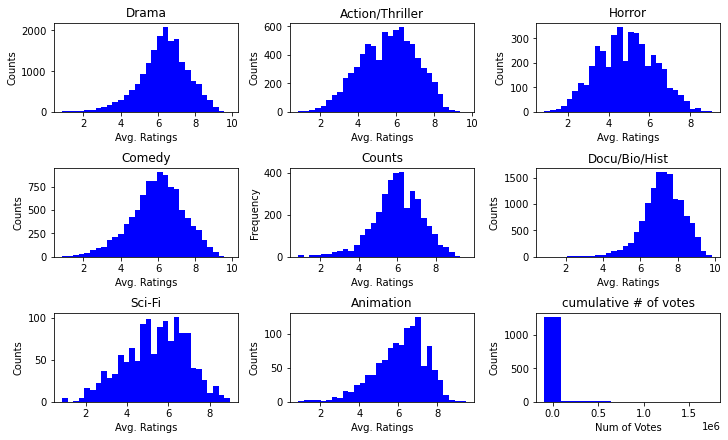

In [85]:
fig, axs = plt.subplots(3, 3, figsize=(10, 6), constrained_layout=True)
axs[0,0].hist(x=df_drama_db['averagerating'], bins=30,align='left', color='blue')
#ax1.hist(x=wins, bins=range(8), align="left", color="green")
#axs[0,0].set_xticks(range(20))
axs[0,0].set_xlabel("Avg. Ratings")
axs[0,0].set_ylabel("Counts")
axs[0,0].set_title("Drama")
axs[0,1].hist(x=df_action_db['averagerating'], bins=30,align='left', color='blue')
axs[0,1].set_xlabel("Avg. Ratings")
axs[0,1].set_ylabel("Counts")
axs[0,1].set_title("Action/Thriller")
axs[0,2].hist(x=df_horror_db['averagerating'], bins=30,align='left', color='blue')
axs[0,2].set_xlabel("Avg. Ratings")
axs[0,2].set_ylabel("Counts")
axs[0,2].set_title("Horror")
axs[1,0].hist(x=df_comedy_db['averagerating'], bins=30,align='left', color='blue')
axs[1,0].set_xlabel("Avg. Ratings")
axs[1,0].set_ylabel("Counts")
axs[1,0].set_title("Comedy")
axs[1,1].hist(x=df_romance_db['averagerating'], bins=30,align='left', color='blue')
axs[1,1].set_xlabel("Avg. Ratings")
axs[1,1].set_ylabel("Frequency")
axs[1,1].set_title("Counts")
axs[1,2].hist(x=df_docu_db['averagerating'], bins=30,align='left', color='blue')
axs[1,2].set_xlabel("Avg. Ratings")
axs[1,2].set_ylabel("Counts")
axs[1,2].set_title("Docu/Bio/Hist")
axs[2,0].hist(x=df_scifi_db['averagerating'], bins=30,align='left', color='blue')
axs[2,0].set_xlabel("Avg. Ratings")
axs[2,0].set_ylabel("Counts")
axs[2,0].set_title("Sci-Fi")
axs[2,1].hist(x=df_anime_db['averagerating'], bins=30,align='left', color='blue')
axs[2,1].set_xlabel("Avg. Ratings")
axs[2,1].set_ylabel("Counts")
axs[2,1].set_title("Animation")
axs[2,2].hist(x=df_scifi_db['numvotes'], align='left', color='blue')
axs[2,2].set_xlabel("Num of Votes")
axs[2,2].set_ylabel("Counts")
axs[2,2].set_title("cumulative # of votes")

#axs[2,2].scatter(df_genres['numvotes'], df_genres['averagerating'], color="green")
#axs[2,2].set_xlabel("Num of votes")
#axs[2,2].set_title("Avg. Ratings");

In [86]:
df_movie_db['primary_title'].value_counts()

Yowamushi Pedal Re: Ride    1
Possum Walk                 1
Belik                       1
Doce Amianto                1
Nowhere in Moravia          1
                           ..
Cam                         1
The Age of Love             1
Unfinished                  1
The Way We Weren't          1
The Class of 92             1
Name: primary_title, Length: 43920, dtype: int64

In [87]:
df_movie_db["primary_name"].value_counts()

Mark Lewis                   4
Adam Green                   3
Bing Wang                    3
Ryan McKenna                 3
John Williams                3
                            ..
Nick Brandestini             1
Örn Marino Arnarson          1
Georgiy Skomorovskiy         1
Alfonso Cortés-Cavanillas    1
Walmer Sitohang              1
Name: primary_name, Length: 43654, dtype: int64

In [88]:
df_movie_db[df_movie_db['primary_name']=='Mark Lewis']

,movie_id,primary_title,start_year,genres,runtime_minutes,primary_name,person_id,averagerating,numvotes,category
16358,tt1568924,Cane Toads: The Conquest,2010,"Comedy,Documentary",85.0,Mark Lewis,nm0507503,7.0,403,director
117969,tt2375232,Wild Girl Waltz,2012,Comedy,82.0,Mark Lewis,nm3378947,7.5,14,director
220935,tt3838154,Invention,2015,None,87.0,Mark Lewis,nm0507505,6.7,17,director
368091,tt7301126,"Silk Road: Drugs, Death and the Dark Web",2017,Documentary,88.0,Mark Lewis,nm2129029,7.3,177,director


In [89]:
df_list=[df_action_db,df_drama_db,df_horror_db,df_romance_db,df_comedy_db,df_scifi_db,df_docu_db,df_anime_db]
list_genres=['action','drama','horror','romance','comedy','sci-fi','docu','anime']

In [90]:
means_genres_list = get_mean_values(df_list,'averagerating')
stds_genres_list  = get_std_values(df_list,'averagerating')
sum_votes_list    = get_sum_values(df_list,'numvotes')
means_votes_list  = get_mean_values(df_list,'numvotes')
stds_votes_list   = get_std_values(df_list,'numvotes')
stds_votes_list

54865361
48625727
10773931
12177637
35015315
18050039
10808696
11603381


[48516.49, 21919.16, 17945.21, 19375.3, 26851.26, 83095.45, 11191.24, 49890.4]

In [91]:
df_action_db.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,7570.000000,6878.000000,7570.000000,7.570000e+03
mean,2013.852576,97.077930,5.727847,7.247736e+03
std,2.584226,21.504832,1.473223,4.851649e+04
min,2010.000000,10.000000,1.000000,5.000000e+00
25%,2012.000000,85.000000,4.700000,2.000000e+01
50%,2014.000000,93.000000,5.800000,9.500000e+01
75%,2016.000000,106.000000,6.800000,6.157500e+02
max,2019.000000,321.000000,9.800000,1.841066e+06


In [92]:
#stds_genres_list=get_std_values(df_list,'averagerating')
#stds_genres_list

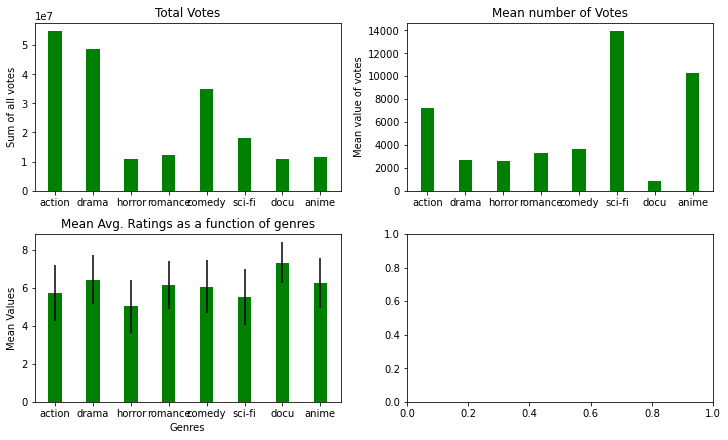

In [93]:
#print("mean # of votes {:0.2f}".format(df_action_db['numvotes'].sum()))
#print("mean # of votes {:0.2f}".format(df_docu_db['numvotes'].sum()))
#print("mean # of votes {:0.2f}".format(df_drama_db['numvotes'].sum()))
#print("mean # of votes {:0.2f}".format(df_scifi_db['numvotes'].sum()))
fig, axs = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)
axs[0,0].bar(list_genres, sum_votes_list,  color='green', width=0.35)
axs[0,1].bar(list_genres, means_votes_list,  color='green', width=0.35,)#yerr=stds_votes_list)
axs[1,0].bar(list_genres, means_genres_list,color ='green',width = 0.35,yerr=stds_genres_list)
#axs[1,1].scatter(means_genres_list,mean_votes_list, color ='green', label=list_genres)
axs[0,0].set_ylabel('Sum of all votes')
axs[0,0].set_title('Total Votes')
#axs[0,0].legend()
axs[0,1].set_ylabel('Mean value of votes')
axs[0,1].set_title('Mean number of Votes')
#axs[0,1].legend()
axs[1,0].set_xlabel("Genres")
axs[1,0].set_ylabel("Mean Values")
axs[1,0].set_title("Mean Avg. Ratings as a function of genres")
#axs[1,1].legend()
plt.show()

I am unsure about if I need to use *movie_akas* which has languaue info and region. I will think about it at the end

Now I will look at the *csv* and *tsv (I converted it into csv file)* files

In [94]:
df_gross_movie = pd.read_csv("zippedData/bom.movie_gross.csv")
df_gross_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [95]:
df_gross_movie.studio.value_counts()

IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
        ... 
ELS        1
IVP        1
U/P        1
TVC        1
CFI        1
Name: studio, Length: 257, dtype: int64

In [96]:
#df_gross_movie[df_gross_movie['title'].str.contains('Harry')=='True']
df_gross_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [97]:
df_budgets_movie = pd.read_csv("zippedData/tn.movie_budgets.csv")
df_budgets_movie

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [98]:
df_budgets_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [99]:
df_budgets_movie.movie.value_counts()

Halloween                                   3
King Kong                                   3
Home                                        3
Total Recall                                2
The Gambler                                 2
                                           ..
Pump                                        1
XXX: State of the Union                     1
School for Scoundrels                       1
The Twilight Saga: Breaking Dawn, Part 2    1
Friday                                      1
Name: movie, Length: 5698, dtype: int64

In [100]:
df_budgets_movie[df_budgets_movie['movie']=='Halloween']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3014,15,"Aug 31, 2007",Halloween,"$15,000,000","$58,269,151","$77,514,401"
3535,36,"Oct 19, 2018",Halloween,"$10,000,000","$159,342,015","$254,900,667"
5536,37,"Oct 17, 1978",Halloween,"$325,000","$47,000,000","$70,000,000"


In [101]:
df_budgets_movie[df_budgets_movie.duplicated()==True]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [102]:
df_gross_movie.title.value_counts()

Bluebeard                                  2
Red Riding Hood                            1
Beauty and the Dogs                        1
Monster Hunt 2                             1
Saint John of Las Vegas                    1
                                          ..
The Company You Keep                       1
The Warrior's Way                          1
Circumstance                               1
The Babadook                               1
Antonio Lopez 1970: Sex Fashion & Disco    1
Name: title, Length: 3386, dtype: int64

Looking at the two files, one named gross and other named budget, it seems budgets file has more entries and 
it contains production budget as well as gross income. So instead of merging, I will just use budgets file. The gross file might contain the info of movies that are not in budgets file, but without the production budget info, I cant do much there

The functions below just convert the columns with dollars info into floats so that I can calculate profit

In [103]:
convert_dollars_to_float(df_budgets_movie,'production_budget')
convert_dollars_to_float(df_budgets_movie,'domestic_gross')
convert_dollars_to_float(df_budgets_movie,'worldwide_gross')

0       2.776345e+09
1       1.045664e+09
2       1.497624e+08
3       1.403014e+09
4       1.316722e+09
            ...     
5777    0.000000e+00
5778    2.404950e+05
5779    1.338000e+03
5780    0.000000e+00
5781    1.810410e+05
Name: worldwide_gross, Length: 5782, dtype: float64

I will define profit (in absolute dollars) using the worldwide gross income  and also domestic profit

In [104]:
df_budgets_movie['profit']=df_budgets_movie['worldwide_gross']-df_budgets_movie['production_budget']
df_budgets_movie['profit_dom']=df_budgets_movie['domestic_gross']-df_budgets_movie['production_budget']
df_budgets_movie

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-307237650.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,303181382.0
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-7000.0
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,2.344950e+05,42482.0
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,-3662.0
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,-1400.0


In [401]:
#df_budgets_movie[df_budgets_movie['movie']=='King Kong']
df_budgets_movie.sort_values(by=['profit'], ascending=False).head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09
66,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,1.216693e+09
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,1.135773e+09


In [153]:
#sorted_df_world = df_budgets_movie.sort_values(by=['profit'], ascending=False)
#sorted_df.head(10)

In [154]:
 #dftest.sort_values(by=['popularity'], ascending=False)
#print(df_gross_movie['title'].value_counts(), df_budgets_movie['movie'].value_counts(), df_Movie_comb['title'].value_counts())

### Reading the other csv files, these files have ids for genres, but I do not know where the values for these ids are defined. So pretty mucg genre_id is uselss as of now

In [169]:
df_tmdb_movie = pd.read_csv("zippedData/tmdb.movies.csv",index_col=0)
df_tmdb_movie.head(50)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [115]:
df_tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [111]:
df_tmdb_movie['title'].value_counts()

Home                        7
Eden                        7
The Gift                    5
Truth or Dare               5
The Box                     5
                           ..
The Bates Haunting          1
Shanghai Belle              1
Porcupine                   1
Haunting of the Innocent    1
Geography Club              1
Name: title, Length: 24688, dtype: int64

In [112]:
df_tmdb_movie[df_tmdb_movie['title']=='Home']

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
3525,"[18, 9648]",79580,ru,Dom,1.823,2011-11-11,Home,5.4,11
9651,[],237303,en,Home,0.840,2013-11-22,Home,7.0,2
14262,"[14, 35, 16, 878, 10751]",228161,en,Home,12.835,2015-03-27,Home,6.8,2372
19580,[],409371,en,Home,0.672,2016-08-01,Home,7.0,1
20446,"[27, 18, 10751]",381507,en,Home,0.600,2016-03-01,Home,4.7,14
20455,[18],388223,en,Home,0.600,2016-03-17,Home,4.5,2
23694,[878],496256,en,Home,0.600,2017-04-30,Home,4.0,1


In [113]:
#df.style.format({"DOB": lambda t: t.strftime("%m/%d/%Y")})
#df_budgets_movie.style.format({"release_date": lambda t: t.strftime("%Y-%m-%d")})
#df_budgets_movie['release_date'] = pd.to_datetime(df_budgets_movie['release_date'])

Changing the release_date column to datetime object and a format that I plan to use for tmdb data table as well so that I can merge on them

In [119]:
df_budgets_movie['release_date'] = pd.to_datetime(df_budgets_movie['release_date'])
df_budgets_movie.style.format({"release_date": lambda t: t.strftime("%Y-%m-%d")})
df_budgets_movie

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-307237650.0
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,303181382.0
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-7000.0
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,2.344950e+05,42482.0
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,-3662.0
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,-1400.0


In [120]:
df_tmdb_movie['release_date'] = pd.to_datetime(df_tmdb_movie['release_date'])
df_tmdb_movie.style.format({"release_date": lambda t: t.strftime("%Y-%m-%d")})
df_tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 3.3+ MB


#### Lets merge budgets information with popularity and vote info from tmdb file

In [121]:
df_budg_tmdb=pd.merge(df_budgets_movie,df_tmdb_movie,how='inner',left_on='movie', right_on='original_title')
df_budg_tmdb

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,378815482.0,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,-70975705.0,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,49,2015-09-01,Exeter,25000.0,0.0,4.897920e+05,4.647920e+05,-25000.0,"[53, 27]",226458,en,Exeter,5.934,2015-03-26,Exeter,4.7,121
2312,51,2015-04-21,Ten,25000.0,0.0,0.000000e+00,-2.500000e+04,-25000.0,"[12, 27, 9648, 53]",279516,en,Ten,1.575,2014-03-28,Ten,5.4,5
2313,54,2014-12-31,Dry Spell,22000.0,0.0,0.000000e+00,-2.200000e+04,-22000.0,"[35, 10749]",255266,en,Dry Spell,0.600,2013-02-14,Dry Spell,6.0,1
2314,56,2013-01-04,All Superheroes Must Die,20000.0,0.0,0.000000e+00,-2.000000e+04,-20000.0,"[878, 53]",86304,en,All Superheroes Must Die,2.078,2013-01-04,All Superheroes Must Die,3.9,19


In [128]:
dftest2[dftest2.duplicated()==True]
df_budg_tmdb[df_budg_tmdb['title']=='Justice League']

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
4,9,2017-11-17,Justice League,300000000.0,229024295.0,655945209.0,355945209.0,-70975705.0,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510
5,9,2017-11-17,Justice League,300000000.0,229024295.0,655945209.0,355945209.0,-70975705.0,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510


In [129]:
dftest2=df_budg_tmdb[df_budg_tmdb['release_date_x']==dftest['release_date_y']]
dftest2.shape

(1401, 17)

In [130]:
df_budg_tmdb.shape

(2316, 17)

In [131]:
df_budg_tmdb = df_budg_tmdb.drop_duplicates()
dftest2      = dftest2.drop_duplicates()

In [132]:
print(df_budg_tmdb.shape,dftest2.shape)

(2144, 17) (1271, 17)


In [133]:
dftest2['movie'].value_counts()

Legend                    2
Robin Hood                2
300: Rise of an Empire    1
Dinner for Schmucks       1
The Dog Lover             1
                         ..
Carol                     1
Widows                    1
LOL                       1
Zootopia                  1
Bridesmaids               1
Name: movie, Length: 1269, dtype: int64

In [134]:
dftest2=dftest2[dftest2['original_language']=='en']
dftest2['movie'].value_counts()

Robin Hood                2
Legend                    2
300: Rise of an Empire    1
Hot Tub Time Machine 2    1
The First Purge           1
                         ..
Safe House                1
Carol                     1
Widows                    1
LOL                       1
Bridesmaids               1
Name: movie, Length: 1239, dtype: int64

In [135]:
#dftest2=dftest2.drop_duplicates(subset='release_date_y', keep="first & last")
#dftest2=dftest2.drop_duplicates()
#dftest2[dftest2['title']=='Robin Hood']
dftest2

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,128405868.0,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,378815482.0,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,-70975705.0,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,20,2015-07-31,Counting,50000.0,8374.0,8.374000e+03,-4.162600e+04,-41626.0,[99],322745,en,Counting,0.600,2015-07-31,Counting,8.3,3
2296,22,2014-02-14,Down and Dangerous,50000.0,0.0,0.000000e+00,-5.000000e+04,-50000.0,"[80, 53, 18]",164286,en,Down and Dangerous,2.621,2014-02-14,Down and Dangerous,4.3,9
2298,25,2015-09-01,"Run, Hide, Die",50000.0,0.0,0.000000e+00,-5.000000e+04,-50000.0,"[53, 27]",290391,en,"Run, Hide, Die",0.600,2015-09-01,"Run, Hide, Die",3.5,2
2308,38,2016-03-18,Krisha,30000.0,144822.0,1.448220e+05,1.148220e+05,114822.0,[18],323929,en,Krisha,5.288,2016-03-18,Krisha,6.8,86


Create a small dataframe with only a few columns that I want to use

In [137]:
df_profit_pop =dftest2[['movie','profit','profit_dom','popularity','vote_average']].copy()


In [138]:
#dftest_new.sort_values(by=['profit','popularity','vote_average'], ascending=False,inplace=True)
df_profit_pop.sort_values(by=['profit'], ascending=False,inplace=True)
df_profit_pop =df_profit_pop.reset_index()
df_small=df_profit_pop.loc[0:20]
df_small

,index,movie,profit,profit_dom,popularity,vote_average
0,0,Avatar,2.351345e+09,335507625.0,26.526,7.4
1,3,Avengers: Infinity War,1.748134e+09,378815482.0,80.773,8.3
2,26,Jurassic World,1.433855e+09,437270625.0,20.709,6.6
3,58,Furious 7,1.328723e+09,163007020.0,20.396,7.3
4,20,The Avengers,1.292936e+09,398279547.0,50.289,7.6
5,34,Black Panther,1.148258e+09,500059566.0,44.140,7.4
6,95,Jurassic World: Fallen Kingdom,1.135773e+09,247719760.0,34.958,6.5
7,114,Beauty and the Beast,1.099200e+09,344014165.0,31.793,6.9
8,402,Minions,1.086336e+09,262045770.0,9.338,6.4
9,2,Avengers: Age of Ultron,1.072414e+09,128405868.0,44.383,7.3


 I am normalizing each column by its mean value so that I can plot popularity, profit and vote average on same plot. This may not be very kosher but I think its okay for this study.

In [139]:
df_small['profit']      =df_small['profit']/df_small['profit'].mean()
df_small['profit_dom']  =df_small['profit_dom']/df_small['profit_dom'].mean()
df_small['popularity']  =df_small['popularity']/df_small['popularity'].mean()
df_small['vote_average'] =df_small['vote_average']/df_small['vote_average'].mean()

<ipython-input-139-ca237730ed85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['profit']      =df_small['profit']/df_small['profit'].mean()
<ipython-input-139-ca237730ed85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['profit_dom']  =df_small['profit_dom']/df_small['profit_dom'].mean()
<ipython-input-139-ca237730ed85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

<AxesSubplot:xlabel='movie'>

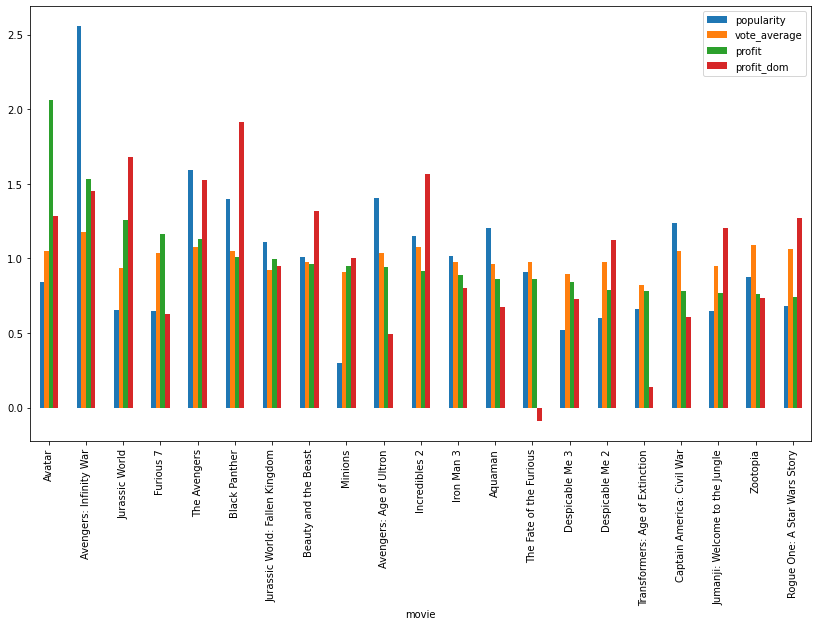

In [143]:
df_small.plot(x="movie", y=["popularity", "vote_average", "profit" ,"profit_dom"], kind="bar", figsize=(14, 8))

In [155]:
#df_small.plot(x="movie", y=["popularity", "vote_average","profit"], kind="bar", figsize=(9, 8))

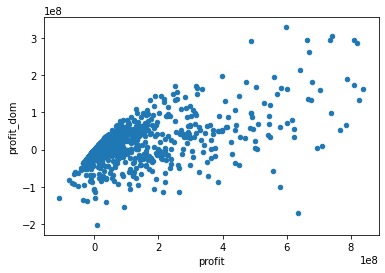

In [144]:
#dftest=dftest.drop_duplicates(subset='release_date_x', keep="first")
ax2 = df_profit_pop.plot.scatter(x='profit',
                    y='profit_dom',
                    colormap='viridis')

In [145]:
df_rt_reviews_movie = pd.read_csv("zippedData/rt.reviews.csv")
df_rt_reviews_movie#['review'][0]

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [147]:
df_rt_info_movie = pd.read_csv("zippedData/rt.movie_info.tsv",sep='\t')
df_rt_info_movie 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [148]:
df_rt_info_movie['genre'].value_counts().head(20)

Drama                                               151
Comedy                                              110
Comedy|Drama                                         80
Drama|Mystery and Suspense                           67
Art House and International|Drama                    62
Action and Adventure|Drama                           42
Action and Adventure|Drama|Mystery and Suspense      40
Drama|Romance                                        35
Comedy|Romance                                       32
Horror                                               31
Art House and International|Comedy|Drama             31
Action and Adventure|Science Fiction and Fantasy     24
Comedy|Drama|Romance                                 23
Classics|Drama                                       21
Action and Adventure|Mystery and Suspense            20
Action and Adventure                                 19
Classics|Drama|Mystery and Suspense                  18
Horror|Mystery and Suspense                     

In [149]:
df_rt_info_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [150]:
df_rt_info_movie.dropna(subset=['director','genre'],inplace=True)
df_rt_info_movie

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1993,A former child actor turned talent agent is hi...,PG,Comedy,James Lapine,NaN,"Jun 4, 1993","Apr 8, 2003",NaN,NaN,95 minutes,NaN
1554,1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN


In [151]:
#df_rt_info_movie[df_rt_info_movie['director']=='Woody Allen']

In [152]:
df_rt_info_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1360 non-null   int64 
 1   synopsis      1321 non-null   object
 2   rating        1360 non-null   object
 3   genre         1360 non-null   object
 4   director      1360 non-null   object
 5   writer        1042 non-null   object
 6   theater_date  1083 non-null   object
 7   dvd_date      1083 non-null   object
 8   currency      299 non-null    object
 9   box_office    299 non-null    object
 10  runtime       1344 non-null   object
 11  studio        440 non-null    object
dtypes: int64(1), object(11)
memory usage: 138.1+ KB


In [386]:
#df_rt_info_movie.groupby('genres')
df_genres=df_rt_info_movie.groupby(['director']).sum()
df_genres

,id
director,
Adam Ravetch|Sarah Robertson,596
Adam Shankman,491
Alex Kendrick|Stephen Kendrick,1149
Alex Proyas,1935
Alexander Payne,1646
...,...
Will Canon,1747
William Friedkin,674
Woody Allen,458


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,Shrek Forever After,6.1,3843


In [324]:
df_rt_info_movie[df_rt_info_movie['id']==3]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [325]:
df_rt_reviews_movie[df_rt_reviews_movie['id']==3]

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
158,3,Beyond its withering critique of contemporary ...,NaN,fresh,David Jenkins,0,Little White Lies,"May 25, 2012"
159,3,"Threatens to soar and to be important, but it ...",3/5,fresh,Dave Calhoun,1,Time Out,"May 25, 2012"
160,3,A parade of hollow didactic encounters.,NaN,rotten,Owen Gleiberman,1,Entertainment Weekly,"May 25, 2012"
161,3,[An] agonisingly self-conscious and meagre pie...,2/5,rotten,Peter Bradshaw,0,Guardian,"May 25, 2012"


### <span style="color:red"> I am not yet sure what to do with these two tables. I can probably use the "df_rt_info_movie" table and study different genres and may be directors. </span>

In [173]:
df_sql_budgets_db =pd.merge(df_budgets_movie,df_movie_db,how='inner',left_on='movie', right_on='primary_title')
df_sql_budgets_db

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,movie_id,primary_title,start_year,genres,runtime_minutes,primary_name,person_id,averagerating,numvotes,category
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0,tt1775309,Avatar,2011,Horror,93.0,Atsushi Wada,nm3786927,6.1,43,director
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy",136.0,Rob Marshall,nm0551128,6.6,447624,director
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-307237650.0,tt6565702,Dark Phoenix,2019,"Action,Adventure,Sci-Fi",113.0,Simon Kinberg,nm1334526,6.0,24451,director
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,-70975705.0,tt0974015,Justice League,2017,"Action,Adventure,Fantasy",120.0,Zack Snyder,nm0811583,6.5,329135,director
4,13,2013-07-02,The Lone Ranger,275000000.0,89302115.0,2.600021e+08,-1.499788e+07,-185697885.0,tt1210819,The Lone Ranger,2013,"Action,Adventure,Western",150.0,Gore Verbinski,nm0893659,6.4,208827,director
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,52,2015-12-01,Dutch Kills,25000.0,0.0,0.000000e+00,-2.500000e+04,-25000.0,tt2759066,Dutch Kills,2015,"Crime,Drama,Thriller",90.0,Joseph Mazzella,nm3556672,5.1,82,director
1302,59,2011-11-25,The Ridges,17300.0,0.0,0.000000e+00,-1.730000e+04,-17300.0,tt1781935,The Ridges,2011,"Drama,Horror,Thriller",89.0,Brandon Landers,nm4192760,2.9,127,director
1303,62,2014-12-31,Stories of Our Lives,15000.0,0.0,0.000000e+00,-1.500000e+04,-15000.0,tt3973612,Stories of Our Lives,2014,Drama,60.0,Jim Chuchu,nm5874888,7.5,85,director
1304,68,2001-07-06,Cure,10000.0,94596.0,9.459600e+04,8.459600e+04,84596.0,tt1872026,Cure,2011,Drama,93.0,Bill Yip,nm0948107,4.9,11,director


In [174]:
df_sql_budgets_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1305
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1306 non-null   int64         
 1   release_date       1306 non-null   datetime64[ns]
 2   movie              1306 non-null   object        
 3   production_budget  1306 non-null   float64       
 4   domestic_gross     1306 non-null   float64       
 5   worldwide_gross    1306 non-null   float64       
 6   profit             1306 non-null   float64       
 7   profit_dom         1306 non-null   float64       
 8   movie_id           1306 non-null   object        
 9   primary_title      1306 non-null   object        
 10  start_year         1306 non-null   int64         
 11  genres             1303 non-null   object        
 12  runtime_minutes    1259 non-null   float64       
 13  primary_name       1306 non-null   object        
 14  person_i

In [175]:
df_sql_budgets_db.genres.value_counts()

Drama                         132
Documentary                    59
Adventure,Animation,Comedy     56
Comedy                         48
Comedy,Drama                   46
                             ... 
Action,Romance,Sport            1
Crime,Fantasy,Thriller          1
Comedy,Fantasy,Sci-Fi           1
Horror,Romance,Thriller         1
Horror,Music,Thriller           1
Name: genres, Length: 244, dtype: int64

In [176]:
df_sql_budgets_db.primary_name.value_counts()

Tim Johnson            3
Ross Whitaker          2
Arshad Yusuf Pathan    2
Jun Falkenstein        2
Chad Zuver             2
                      ..
Trevor Wall            1
Genndy Tartakovsky     1
Mijke de Jong          1
Jérôme Salle           1
Kelly Fremon Craig     1
Name: primary_name, Length: 1269, dtype: int64

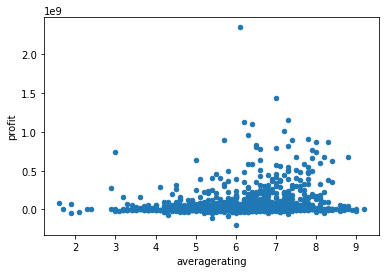

In [177]:
ax2 = df_sql_budgets_db.plot.scatter(x='averagerating',
                    y='profit',
                    colormap='viridis')

In [178]:
df_sql_budtmdb_db =pd.merge(df_budg_tmdb,df_movie_db,how='inner',left_on='movie', right_on='primary_title')
df_sql_budtmdb_db

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_dom,genre_ids,id_y,...,movie_id,primary_title,start_year,genres,runtime_minutes,primary_name,person_id,averagerating,numvotes,category
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,335507625.0,"[28, 12, 14, 878]",19995,...,tt1775309,Avatar,2011,Horror,93.0,Atsushi Wada,nm3786927,6.1,43,director
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,-169536125.0,"[12, 28, 14]",1865,...,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy",136.0,Rob Marshall,nm0551128,6.6,447624,director
2,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,-70975705.0,"[28, 12, 14, 878]",141052,...,tt0974015,Justice League,2017,"Action,Adventure,Fantasy",120.0,Zack Snyder,nm0811583,6.5,329135,director
3,13,2013-07-02,The Lone Ranger,275000000.0,89302115.0,2.600021e+08,-1.499788e+07,-185697885.0,"[28, 12, 37]",57201,...,tt1210819,The Lone Ranger,2013,"Action,Adventure,Western",150.0,Gore Verbinski,nm0893659,6.4,208827,director
4,14,2012-03-09,John Carter,275000000.0,73058679.0,2.827781e+08,7.778100e+06,-201941321.0,"[28, 12, 878]",49529,...,tt0401729,John Carter,2012,"Action,Adventure,Sci-Fi",132.0,Andrew Stanton,nm0004056,6.6,241792,director
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,38,2016-03-18,Krisha,30000.0,144822.0,1.448220e+05,1.148220e+05,114822.0,[18],259043,...,tt4266638,Krisha,2015,Drama,83.0,Trey Edward Shults,nm4099092,7.2,5917,director
1207,38,2016-03-18,Krisha,30000.0,144822.0,1.448220e+05,1.148220e+05,114822.0,[18],323929,...,tt4266638,Krisha,2015,Drama,83.0,Trey Edward Shults,nm4099092,7.2,5917,director
1208,45,2017-01-27,Emily,27000.0,3547.0,3.547000e+03,-2.345300e+04,-23453.0,[18],359406,...,tt4393036,Emily,2017,Drama,83.0,Ryan Graves,nm6254824,6.8,13,director
1209,49,2015-09-01,Exeter,25000.0,0.0,4.897920e+05,4.647920e+05,-25000.0,"[53, 27]",226458,...,tt1945044,Exeter,2015,"Horror,Mystery,Thriller",91.0,Marcus Nispel,nm1197971,4.5,5156,director


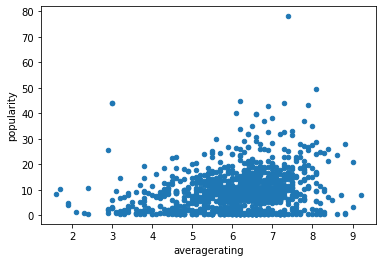

In [179]:
ax2 = df_sql_budtmdb_db.plot.scatter(x='averagerating',
                    y='popularity',
                    colormap='viridis')